# In this project , I am analyzing policing activity from a  dataset (https://openpolicing.stanford.edu/)  and analyze the impact of different factors  on police behavior

## PART A :  Preparing, Cleaning Data Set for summarizing and analyzing data set

In [1]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

# Examine the head of the DataFrame
print(ri.head(5))

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [2]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis = 'columns', inplace =True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


In [3]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


In [4]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [5]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [6]:
# Convert the improper data Types

print(ri.is_arrested.dtypes) # check the data type of the 'is_arrested' column


ri['is_arrested'] = ri.is_arrested.astype('bool') # change the data type to bool

 
print(ri.is_arrested.dtypes) # again Check the data type of 'is_arrested'

object
bool


In [7]:
# Combining "stop_date" and "stop_time" into one column and  Convert it to datetime object


combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ') 


ri['stop_datetime'] = pd.to_datetime(combined)


print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [8]:
# setting the 'stop_datetime' as an index

ri.set_index('stop_datetime', inplace=True)

print(ri.index)

print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


## PART B: Explore some relationship between different series  

In [9]:
# Lets Analyze Effect of Gender on committing traffic violations

In [10]:
print(ri.violation.value_counts())

print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


In [11]:
female = ri[ri.driver_gender == 'F']

male = ri[ri.driver_gender == 'M']

print(female.violation.value_counts(normalize=True))

print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [12]:
# analyzing Co-relation between gender and violtion 

female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

print(female_and_speeding.stop_outcome.value_counts(normalize = True))

print(male_and_speeding.stop_outcome.value_counts(normalize = True))

# Result : Data Shows for M and F around 95% of stops for speeding result in a citations. Hence, the data fails to predict the  gender has an impact on who gets a ticket for speeding

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [13]:
# Calculating the searching  rate

print(ri.search_conducted.dtypes)

print(ri.search_conducted.value_counts(normalize = True))

print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


In [14]:
# Calculate the rates at which female and male drivers are searched during a traffic stop
print(ri[ri.driver_gender == 'F'].search_conducted.mean())
print(ri[ri.driver_gender == 'M'].search_conducted.mean())
print(ri.groupby('driver_gender').search_conducted.mean())

# Results Shows that Male drivers are searched more than twice as often as female drivers.

0.019180617481282074
0.04542557598546892
driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [15]:
# Theory : even though the search rate for males is twice as high as for females, there is possiblility  that the difference is mostly due to a other factor. Lets Examine that 
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [16]:
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


In [17]:
# Checking about Search Type : either inventory, protective frisk etcc

print(ri.search_type.value_counts())

ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

print(ri.frisk.dtypes)

print(ri.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [18]:
# Now Compare the Protective Risk factor by gender

searched = ri[ri.search_conducted == True]

print(searched.frisk.mean())

print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


## Part C: Visualize the data instead of Raw data

In [20]:
# Analyze the hourly arrest rate for traffic violation
ri.index
print(ri.is_arrested.mean())

print(ri.groupby(ri.index.hour).is_arrested.mean())

hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


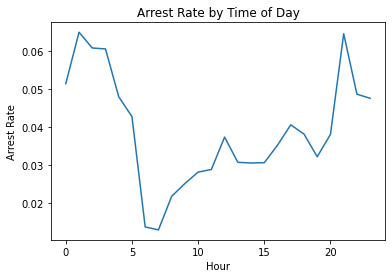

In [23]:
# Visualize the data

import matplotlib.pyplot as plt
hourly_arrest_rate.plot() #x = 'Hour',y ='Arrest Rate', kind="line"
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()


stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


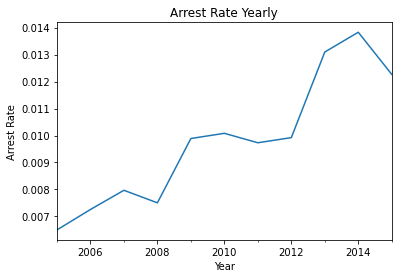

In [26]:
# Hows Drug related cases lead to traffic violation (used resampling method)

print(ri.drugs_related_stop.resample('A').mean())

annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

annual_drug_rate.plot()
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate Yearly')

plt.show()

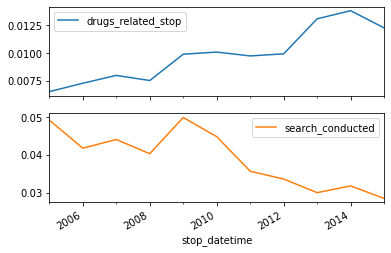

In [27]:
# Now comapre the drugs found and search rate 
annual_search_rate = ri.search_conducted.resample('A').mean()
#annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

annual.plot(subplots=True)

plt.show()

In [28]:
# Analyzing traffic violations by district

all_zones = pd.crosstab(ri.district, ri.violation)

k_zones = all_zones.loc['Zone K1':'Zone K3']

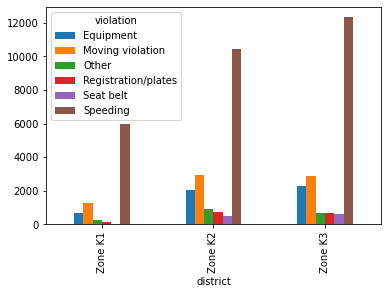

In [29]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind = 'bar')

plt.show()

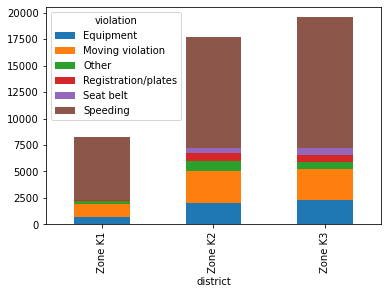

In [30]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind = 'bar', stacked = True)

plt.show()

In [31]:
# Analyze the duration for which teh car was stopped

print(ri.stop_duration.unique())

mapping = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45}

ri['stop_minutes'] = ri.stop_duration.map(mapping)

print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


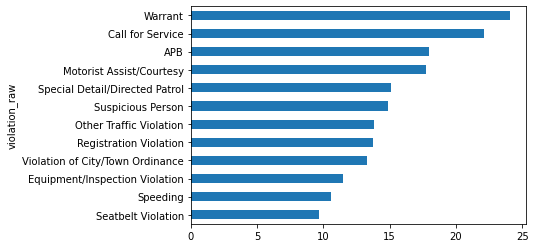

In [32]:
# How long a driver was detained 

print(ri.groupby('violation_raw').stop_minutes.mean())

stop_length = ri.groupby('violation_raw').stop_minutes.mean()

stop_length.sort_values().plot(kind = 'barh')

plt.show()

## PART D:  Analyze the impact of weather on behaviour

In [33]:
weather = pd.read_csv('weather.csv')
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [35]:
# Examine the Data set:
weather[['TAVG','AWND']].head()

,TAVG,AWND
0,44.0,8.95
1,36.0,9.40
2,49.0,6.93
3,42.0,6.93
4,36.0,7.83


In [36]:
weather[['TAVG','AWND']].describe()

,TAVG,AWND
count,1217.000000,4017.000000
mean,52.493016,8.593707
std,17.830714,3.364601
min,6.000000,0.220000
25%,39.000000,6.260000
50%,54.000000,8.050000
75%,68.000000,10.290000
max,86.000000,26.840000


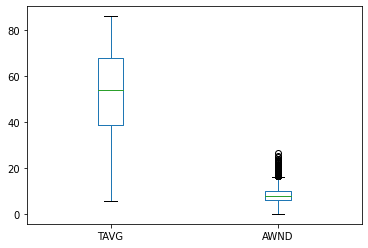

In [37]:
weather[['TAVG','AWND']].plot(kind='box')

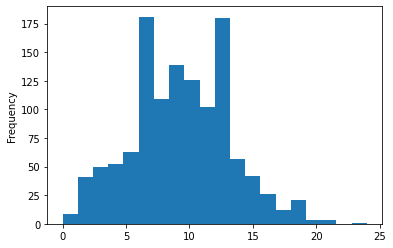

In [40]:
weather['TEMP_DIFF'] = weather['TMAX']-weather['TAVG']
weather.TEMP_DIFF.plot(kind='hist', bins = 20)
plt.show()

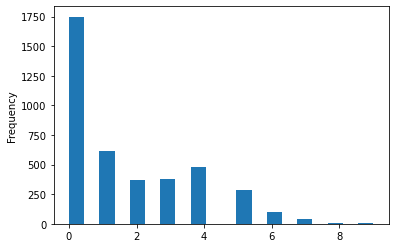

In [42]:
# Lets Quantify the Bad Weather Conditions

WT = weather.loc[:,'WT01':'WT22']

weather['bad_conditions'] = WT.sum(axis = 'columns')

weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

weather.bad_conditions.plot(kind= 'hist', bins = 20)

plt.show()

# It seems lot more ays didn't have any bad weather conditions, and only a minuscule portion of days had greater than four bad weather conditions

In [65]:
# seen the number of bad weather conditions each  particular day and now use the counts to create a rating system for the weather.

print(weather.bad_conditions.value_counts().sort_index())


mapping = {0:'good', 1:'bad', 2:'bad', 3: 'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

weather['rating'] = weather.bad_conditions.map(mapping)

print(weather.rating.value_counts())




0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [66]:
# change rating data type to category to store the data more efficiently
cats = ['good', 'bad', 'worse']

weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)

print(weather.rating.head())


In [67]:
# Analyze effect of weather on Police behaviour and prepare the traffic stop and weather rating DataFrames

ri.reset_index(inplace=True)

print(ri.head())

weather_rating = weather[['DATE', "rating"]] 

print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

In [68]:
# Merge the two dataframe 
print(ri.shape)


ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')


print(ri_weather.shape)


ri_weather.set_index('stop_datetime', inplace=True)

(86536, 16)
(86536, 18)


In [69]:
print(ri_weather.is_arrested.mean())

print(ri_weather.groupby(['rating']).is_arrested.mean())

print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

0.0355690117407784
rating
bad      0.036261
good     0.033715
worse    0.041667
Name: is_arrested, dtype: float64
violation            rating
Equipment            bad       0.066311
                     good      0.059007
                     worse     0.097357
Moving violation     bad       0.058050
                     good      0.056227
                     worse     0.065860
Other                bad       0.087443
                     good      0.076966
                     worse     0.062893
Registration/plates  bad       0.098160
                     good      0.081574
                     worse     0.115625
Seat belt            bad       0.022493
                     good      0.028587
                     worse     0.000000
Speeding             bad       0.013314
                     good      0.013405
                     worse     0.016886
Name: is_arrested, dtype: float64


In [70]:

arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()


print(arrest_rate)


print(arrest_rate.loc['Moving violation', 'bad'])

print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            bad       0.066311
                     good      0.059007
                     worse     0.097357
Moving violation     bad       0.058050
                     good      0.056227
                     worse     0.065860
Other                bad       0.087443
                     good      0.076966
                     worse     0.062893
Registration/plates  bad       0.098160
                     good      0.081574
                     worse     0.115625
Seat belt            bad       0.022493
                     good      0.028587
                     worse     0.000000
Speeding             bad       0.013314
                     good      0.013405
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
bad      0.013314
good     0.013405
worse    0.016886
Name: is_arrested, dtype: float64


In [71]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                    bad      good     worse
violation                                        
Equipment            0.066311  0.059007  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076966  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013405  0.016886
rating                    bad      good     worse
violation                                        
Equipment            0.066311  0.059007  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076966  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013405  0.016886


In [72]:
# Unstacking method 
print(arrest_rate.unstack())

print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                    bad      good     worse
violation                                        
Equipment            0.066311  0.059007  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076966  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013405  0.016886
rating                    bad      good     worse
violation                                        
Equipment            0.066311  0.059007  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076966  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013405  0.016886
